C:\Users\mckays1\AppData\Local\Temp\ipykernel_1284\1771255241.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').mean()


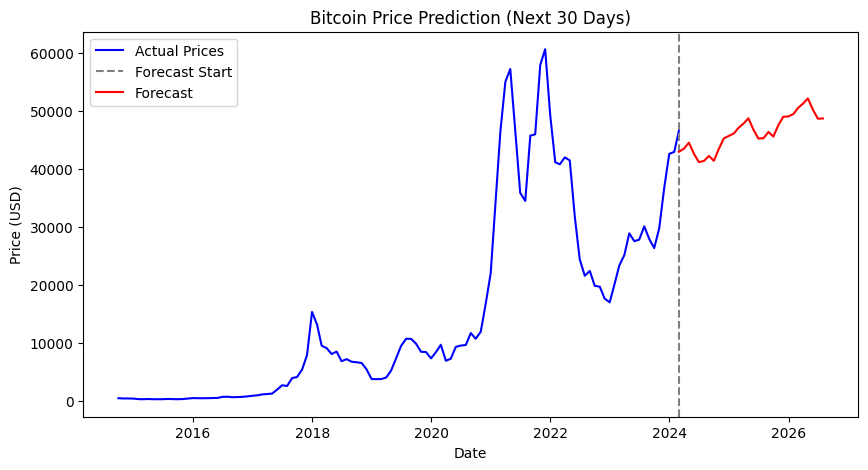

Predicted prices for the next 30 days:
2024-02-29    42925.052412
2024-03-31    43479.085023
2024-04-30    44503.647481
2024-05-31    42555.502573
2024-06-30    41150.571675
2024-07-31    41341.414280
2024-08-31    42207.666107
2024-09-30    41379.853611
2024-10-31    43461.737619
2024-11-30    45235.331839
2024-12-31    45668.843960
2025-01-31    46091.169317
2025-02-28    47049.780097
2025-03-31    47799.329789
2025-04-30    48704.472099
2025-05-31    46732.147565
2025-06-30    45215.729906
2025-07-31    45261.936429
2025-08-31    46341.023152
2025-09-30    45563.033182
2025-10-31    47550.234972
2025-11-30    48973.072981
2025-12-31    49024.635912
2026-01-31    49450.395664
2026-02-28    50474.993316
2026-03-31    51238.078424
2026-04-30    52134.953428
2026-05-31    50160.954970
2026-06-30    48636.819222
2026-07-31    48673.012770
Freq: ME, Name: predicted_mean, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
df = pd.read_csv("data/BTC-USD.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample to monthly frequency
df_monthly = df['Close'].resample('M').mean()

# Split into train and test
train = df_monthly.iloc[:-1]
test = df_monthly.iloc[-1:]

# Fit SARIMAX model
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast next 30 days
forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Extract forecast values
forecast_index = predicted_mean.index.to_pydatetime()
forecast_values = predicted_mean.values
conf_lower = conf_int.iloc[:, 0].values
conf_upper = conf_int.iloc[:, 1].values

# Plot results
plt.figure(figsize=(10,5))
plt.plot(df_monthly, label="Actual Prices", color="blue")
plt.axvline(test.index[0], color="gray", linestyle="--", label="Forecast Start")
plt.plot(forecast_index, forecast_values, label="Forecast", color="red")
plt.legend()
plt.title("Bitcoin Price Prediction (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

# Output forecasted prices
print("Predicted prices for the next 30 days:")
print(predicted_mean)